<a href="https://colab.research.google.com/github/sayan0506/Real-time-facial-expression-detection/blob/master/FER_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we are creating the facial emotion detection model from Emotion FER dataset and implement that model for detectng facial expression in realtime

The necessary python modules are imported here

In [37]:
import os
from matplotlib import  pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator as IDG
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization, Activation, Dropout
from keras.optimizers import Adam
from keras.applications.inception_v3 import InceptionV3

In [4]:
import zipfile

with zipfile.ZipFile('/content/drive/My Drive/FER Dataset/Dataset.zip') as zip_ref:
  zip_ref.extractall('/content')

In [5]:
facial_expressions = os.listdir('/content/Dataset/train/')
print('List of facial expressions:\n',facial_expressions)

List of facial expressions:
 ['fear', 'neutral', 'happy', 'surprise', 'sad', 'angry', 'disgust']


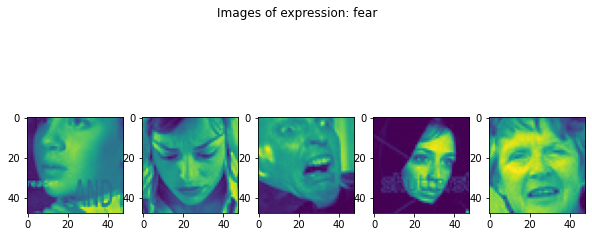

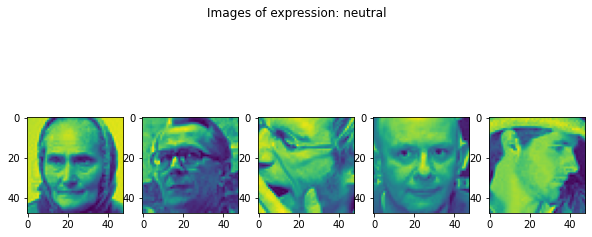

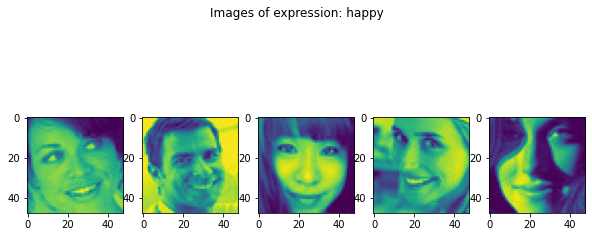

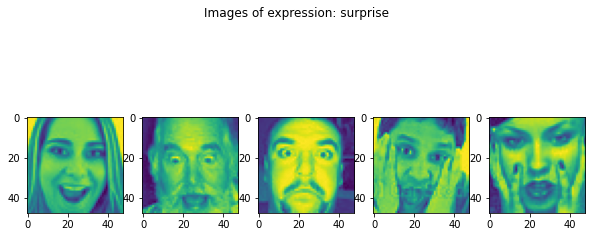

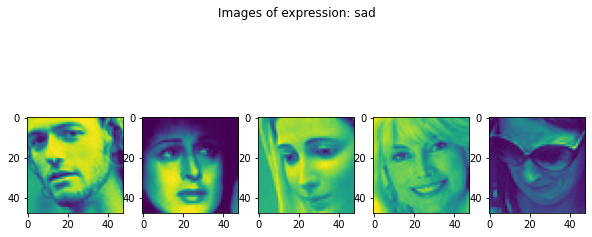

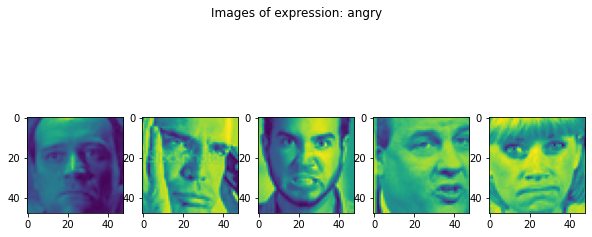

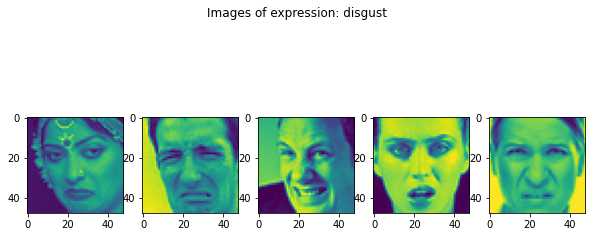

In [10]:
train_dir = '/content/Dataset/train/'
test_dir = '/content/Dataset/test/'

img_count = 0
for expression in os.listdir(train_dir):
  fig = plt.figure(figsize=(10,15))
  fig.suptitle('Images of expression: '+ expression)
  for c, image in enumerate(os.listdir(train_dir + expression + '/')[:5]):
    fig.add_subplot(7, 5, c+1)
    plt.imshow(plt.imread(train_dir + expression + '/'+image))
plt.show()

In [41]:
# Creating image_data_generator object for train and test images 
batch_size = 128

train_datagen = IDG(rescale = 1./255.0,
                    horizontal_flip = True)
test_datagen = IDG(rescale = 1./255.0)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    color_mode = 'grayscale',
                                                    class_mode = 'categorical',
                                                    batch_size = batch_size,
                                                    target_size = (48,48)
                                                    )
test_generator = test_datagen.flow_from_directory(test_dir,
                                                    color_mode = 'grayscale',
                                                    class_mode = 'categorical',
                                                    batch_size = batch_size,
                                                    target_size = (48,48)
                                                    )


Found 28708 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [42]:
# Building the CNN model

model = Sequential()
# Convolution layer 1
model.add(Conv2D(64, (3,3), padding = 'same', input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

# Convolution layer 2
model.add(Conv2D(128, (5,5), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

# Convolution layer 3
model.add(Conv2D(512, (3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

# Convolution layer 4
model.add(Conv2D(512, (3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

# Flatten layer
model.add(Flatten())

# Fully connected layer 1
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# output layer
model.add(Dense(7, activation = 'softmax'))

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_134 (Conv2D)          (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_109 (Bat (None, 48, 48, 64)        256       
_________________________________________________________________
activation_106 (Activation)  (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_135 (Conv2D)          (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_110 (Bat (None, 24, 24, 128)     

In [44]:
model.compile(optimizer= Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['acc'])

history = model.fit_generator(train_generator, epochs = 20, verbose = 1, validation_data=test_generator)

Epoch 1/20
225/225 [==============================] - 12s 54ms/step - loss: 0.5555 - acc: 0.7929 - val_loss: 1.2132 - val_acc: 0.6010
Epoch 2/20
225/225 [==============================] - 12s 53ms/step - loss: 0.5356 - acc: 0.8018 - val_loss: 1.1462 - val_acc: 0.6251
Epoch 3/20
225/225 [==============================] - 12s 53ms/step - loss: 0.5105 - acc: 0.8117 - val_loss: 1.2573 - val_acc: 0.6248
Epoch 4/20
225/225 [==============================] - 12s 53ms/step - loss: 0.5065 - acc: 0.8129 - val_loss: 1.1550 - val_acc: 0.6350
Epoch 5/20
225/225 [==============================] - 12s 54ms/step - loss: 0.4777 - acc: 0.8237 - val_loss: 1.1984 - val_acc: 0.6245
Epoch 6/20
225/225 [==============================] - 12s 54ms/step - loss: 0.4749 - acc: 0.8254 - val_loss: 1.1769 - val_acc: 0.6354
Epoch 7/20
225/225 [==============================] - 12s 54ms/step - loss: 0.4488 - acc: 0.8340 - val_loss: 1.1605 - val_acc: 0.6449
Epoch 8/20
225/225 [==============================] - 12s 54ms